<div>
    <h1 align="center"> Project EDA Draft </h1>
    <p align="center"> Will put an appropriate title in the future. As of now, this will focus on EDA </p>
</div>

<h4 align="center">Dataset Information</h4>
<div>
    <p align="center"> Dataset:<b> Global Earthquake-Tsunami Risk Assessment Dataset </b> <br> 
    Seismic Features & Tsunami Classification Dataset for Risk Assessment 
Dataset Information <br><br>
    Source: Kaggle <br>
    Total Records: 782 earthquakes <br>
    Time Period: January 1, 2001 to December 31, 2022 (22 years) <br>
    Geographic Coverage: Global (Latitude: -61.85° to 71.63°, Longitude: -179.97° to 179.66°) <br></p><br>
</div>

--- 

<b>Feature Description</b>
| Feature     | Type    | Description                                      | Range/Values                     | Tsunami Relevance                         |
|-------------|---------|--------------------------------------------------|----------------------------------|-------------------------------------------|
| magnitude   | Float   | Earthquake magnitude (Richter scale)             | 6.5 – 9.1                        | High – Primary tsunami predictor          |
| cdi         | Integer | Community Decimal Intensity (felt intensity)     | 0 – 9                            | Medium – Population impact measure        |
| mmi         | Integer | Modified Mercalli Intensity (instrumental)       | 1 – 9                            | Medium – Structural damage indicator      |
| sig         | Integer | Event significance score                         | 650 – 2910                       | High – Overall hazard assessment          |
| nst         | Integer | Number of seismic monitoring stations            | 0 – 934                          | Low – Data quality indicator              |
| dmin        | Float   | Distance to nearest seismic station (degrees)    | 0.0 – 17.7                       | Low – Location precision                  |
| gap         | Float   | Azimuthal gap between stations (degrees)         | 0.0 – 239.0                      | Low – Location reliability                |
| depth       | Float   | Earthquake focal depth (km)                      | 2.7 – 670.8                      | High – Shallow = higher tsunami risk      |
| latitude    | Float   | Epicenter latitude (WGS84)                       | -61.85° to 71.63°                | High – Ocean proximity indicator          |
| longitude   | Float   | Epicenter longitude (WGS84)                      | -179.97° to 179.66°              | High – Ocean proximity indicator          |
| Year        | Integer | Year of occurrence                               | 2001 – 2022                      | Medium – Temporal patterns                |
| Month       | Integer | Month of occurrence                              | 1 – 12                           | Low – Seasonal analysis                   |
| tsunami     | Binary  | Tsunami potential (**TARGET**)                   | 0, 1                             | **TARGET VARIABLE**                       |


### **Development Log**

2025-10-25  
*Added folder and file. Had a problem with importing the file link from Kaggle.*  
its-very-berry-dark

--

2025-11-02  
**v0.1** | Fixing the dataset importation  
*There was some problem with importation, it might be my laptop.*  
its-very-berry-dark
- Added dataset information (from Kaggle)
- Performed some basic brief overview

--

#### 2025-11-08
**v1.1** | Added EDA segment  
its-very-berry-dark
- Edited ['tsunami'] column dtype.
- Performed histogram and bar plot in ['magnitude'] column.

--

#### 2025-11-09
**v1.1** | Added mmi and cdi charts   
its-very-berry-dark
- Added charts (barplots and lineplots) for the stated columns.

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt

from kagglehub import KaggleDatasetAdapter

C:\Users\rdber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Download the dataset and get its folder path
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

print("Dataset path:", path)
print(f"Files inside the dataset folder: {os.listdir(path)}")   # whatever comes from this should be attached as the file name


Dataset path: C:\Users\rdber\.cache\kagglehub\datasets\ahmeduzaki\global-earthquake-tsunami-risk-assessment-dataset\versions\1
Files inside the dataset folder: ['earthquake_data_tsunami.csv']


In [17]:
df = pd.read_csv(f"{path}/earthquake_data_tsunami.csv")         # <- the said file name
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


*<span style="color: gray;"> 
<b> Author's input:  </b>  
Finally managed to access the dataset just by using Kaggle link in my VS Code! That somehow took long </span>*

In [4]:
## Brief overview of dataset ##
missing = df.isnull().sum()
dtypes = df.dtypes

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_count = outliers.sum()

In [8]:
summary = pd.DataFrame({'Missing Values': missing, 'Outliers': outlier_count, "Dtypes": dtypes})
summary

,Missing Values,Outliers,Dtypes
magnitude,0,37,float64
cdi,0,0,int64
mmi,0,1,int64
sig,0,73,int64
nst,0,0,int64
dmin,0,61,float64
gap,0,48,float64
depth,0,139,float64
latitude,0,0,float64
longitude,0,0,float64


In [ ]:
## the only binary column in the dataset
df["tsunami"] = df["tsunami"].astype('category')    # transforming it into category dtype
df["tsunami"].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  782 non-null    float64 
 1   cdi        782 non-null    int64   
 2   mmi        782 non-null    int64   
 3   sig        782 non-null    int64   
 4   nst        782 non-null    int64   
 5   dmin       782 non-null    float64 
 6   gap        782 non-null    float64 
 7   depth      782 non-null    float64 
 8   latitude   782 non-null    float64 
 9   longitude  782 non-null    float64 
 10  Year       782 non-null    int64   
 11  Month      782 non-null    int64   
 12  tsunami    782 non-null    category
dtypes: category(1), float64(6), int64(6)
memory usage: 74.3 KB


### Exploratory Data Analysis

Since the dataset has no null values and is purely numerical, there's no necessity for dropping rows or records. Furthermore, outliers might provide helpful insight towards this dataset, that is the reason why it won't be removed.

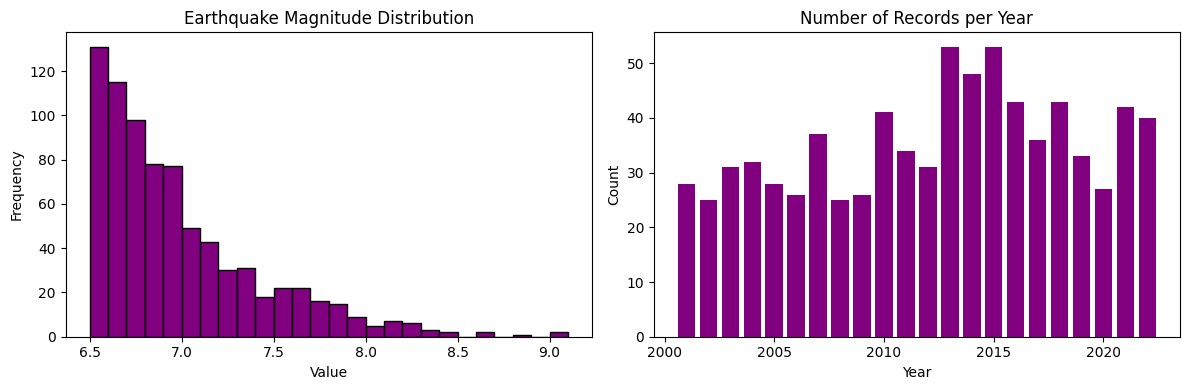

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Hist plot
axes[0].hist(df['magnitude'], bins=26, color='purple', edgecolor='black')
axes[0].set_title('Earthquake Magnitude Distribution')
axes[0].set_xlabel("Value")        
axes[0].set_ylabel("Frequency") 

# Bar plot
year_counts = df['Year'].value_counts().sort_index()
axes[1].bar(year_counts.index, year_counts.values, color='purple')
axes[1].set_title("Number of Records per Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

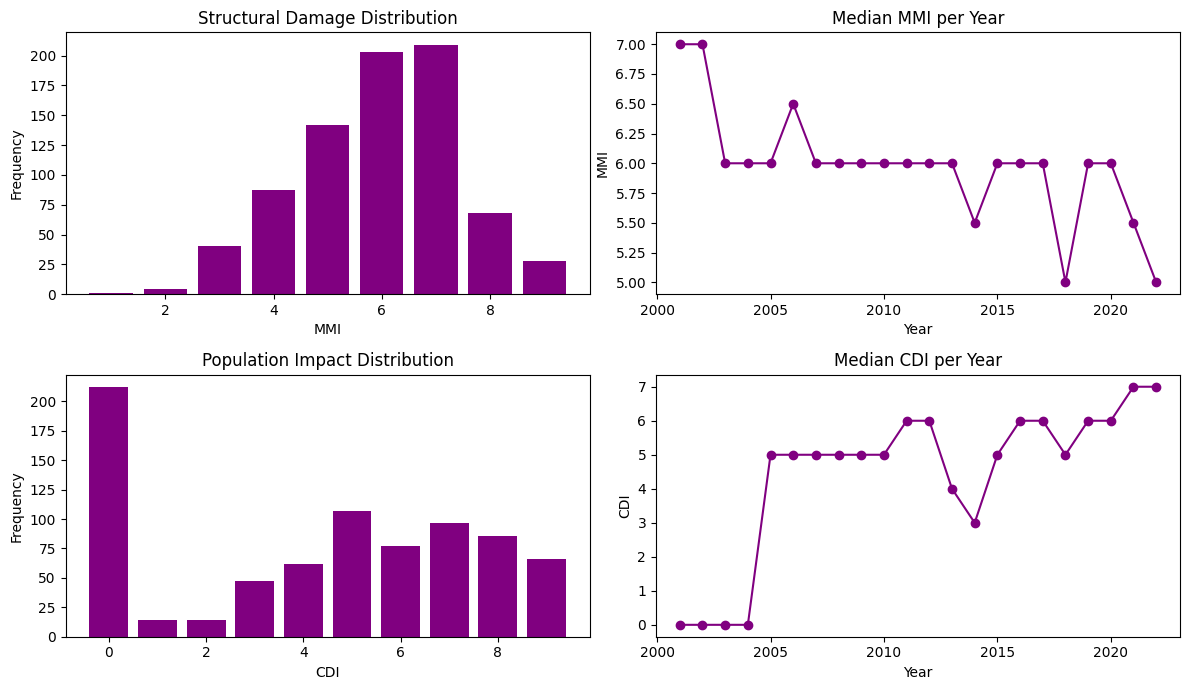

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,7))

## Bar plot: MMI frequency per index
mmi_counts = df['mmi'].value_counts().sort_index()
axes[0, 0].bar(mmi_counts.index, mmi_counts.values, color='purple')
axes[0, 0].set_title('Structural Damage Distribution')
axes[0, 0].set_xlabel("MMI")        
axes[0, 0].set_ylabel("Frequency") 

## Line plot: Median MMI per year
year_counts = df['Year'].value_counts().sort_index()
avg_mmi = df.groupby('Year')['mmi'].median()

axes[0, 1].plot(avg_mmi.index, avg_mmi.values, color='purple', marker='o')
axes[0, 1].set_title("Median MMI per Year")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("MMI")

## Bar plot: CDI frequency per index
cdi_counts = df['cdi'].value_counts().sort_index()
axes[1, 0].bar(cdi_counts.index, cdi_counts.values, color='purple')
axes[1, 0].set_title('Population Impact Distribution')
axes[1, 0].set_xlabel("CDI")        
axes[1, 0].set_ylabel("Frequency") 

## Line plot: Median CDI per year
year_counts = df['Year'].value_counts().sort_index()
avg_cdi = df.groupby('Year')['cdi'].median()

axes[1, 1].plot(avg_cdi.index, avg_cdi.values, color='purple', marker='o')
axes[1, 1].set_title("Median CDI per Year")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("CDI")

plt.tight_layout()
plt.show()